In [24]:
!pip install astropy astroquery jdaviz jwst reproject photutils

In [65]:
from astroquery.mast import Observations
import os

# JWST filters to use for RGB and false color compositing
jwst_filters = ["F405N", "F360M", "F470N","F162M"]
# jwst_filters = ["F162M"]
proposal_id = 4147
target_name = "SGR-C"
max_files_per_filter=30

base_dir = "sgrc_download"
os.makedirs(base_dir, exist_ok=True)

for filt in jwst_filters:
    print(f"\n🔍 Searching for filter: {filt}")
    output_dir = os.path.join(base_dir, filt)
    os.makedirs(output_dir, exist_ok=True)

    # Search JWST NIRCam observations for SGR-C
    obs_table = Observations.query_criteria(
        obs_collection="JWST",
        instrument_name="NIRCAM/IMAGE",
        dataproduct_type="image",
        calib_level=3,
        filters=[filt],
        proposal_id=proposal_id,
        target_name=target_name
    )

    if len(obs_table) == 0:
        print(f"⚠️ No observations found for filter {filt}")
        continue

    # Get product list
    products = Observations.get_product_list(obs_table)

    # Filter for I2D FITS files (drizzled 2D)
    i2d_products = Observations.filter_products(
        products,
        productSubGroupDescription="I2D",
        extension="fits"
    )

    if len(i2d_products) == 0:
        print(f"⚠️ No I2D FITS files found for {filt}")
        continue

    # Choose first product (typically the full field)
    selected = i2d_products[max_files_per_filter]

    # Download file
    manifest = Observations.download_products(selected, download_dir=output_dir)
    print(f"✅ Downloaded {len(manifest)} file(s) for {filt} to {output_dir}")



🔍 Searching for filter: F405N


INFO:astroquery:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147-o012_t001_nircam_f405n-f444w/jw04147-o012_t001_nircam_f405n-f444w_i2d.fits with expected size 360025920.
2025-04-21 05:50:30,303 - stpipe - INFO - Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147-o012_t001_nircam_f405n-f444w/jw04147-o012_t001_nircam_f405n-f444w_i2d.fits with expected size 360025920.
INFO:stpipe:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147-o012_t001_nircam_f405n-f444w/jw04147-o012_t001_nircam_f405n-f444w_i2d.fits with expected size 360025920.
INFO:astroquery:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00001_nrcalong/jw04147012001_04101_00001_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 05:50:30,472 - stpipe - INFO - Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00001_nrcalong/jw04147012001_04101_00001_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_

INFO: Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147-o012_t001_nircam_f405n-f444w/jw04147-o012_t001_nircam_f405n-f444w_i2d.fits with expected size 360025920. [astroquery.query]
INFO: Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00001_nrcalong/jw04147012001_04101_00001_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00001_nrcblong/jw04147012001_04101_00001_nrcblong_i2d.fits with expected size 120225600.
2025-04-21 05:50:30,600 - stpipe - INFO - Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00001_nrcblong/jw04147012001_04101_00001_nrcblong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00001_nrcblong/jw04147012001_04101_00001_nrcblong_i2d.fits with expected size 120225600.
INFO:astroquery:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00002_nrcalong/jw04147012001_04101_00002_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 05:50:30,731 - stpipe - INFO - Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00002_nrcalong/jw04147012001_04101_00002_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F40

INFO: Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00001_nrcblong/jw04147012001_04101_00001_nrcblong_i2d.fits with expected size 120225600. [astroquery.query]
INFO: Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00002_nrcalong/jw04147012001_04101_00002_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00002_nrcblong/jw04147012001_04101_00002_nrcblong_i2d.fits with expected size 120225600.
2025-04-21 05:50:30,858 - stpipe - INFO - Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00002_nrcblong/jw04147012001_04101_00002_nrcblong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00002_nrcblong/jw04147012001_04101_00002_nrcblong_i2d.fits with expected size 120225600.
INFO:astroquery:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00003_nrcalong/jw04147012001_04101_00003_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 05:50:30,981 - stpipe - INFO - Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00003_nrcalong/jw04147012001_04101_00003_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F40

INFO: Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00002_nrcblong/jw04147012001_04101_00002_nrcblong_i2d.fits with expected size 120225600. [astroquery.query]
INFO: Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00003_nrcalong/jw04147012001_04101_00003_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00003_nrcblong/jw04147012001_04101_00003_nrcblong_i2d.fits with expected size 120225600.
2025-04-21 05:50:31,115 - stpipe - INFO - Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00003_nrcblong/jw04147012001_04101_00003_nrcblong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00003_nrcblong/jw04147012001_04101_00003_nrcblong_i2d.fits with expected size 120225600.
INFO:astroquery:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00004_nrcalong/jw04147012001_04101_00004_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 05:50:31,254 - stpipe - INFO - Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00004_nrcalong/jw04147012001_04101_00004_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F40

INFO: Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00003_nrcblong/jw04147012001_04101_00003_nrcblong_i2d.fits with expected size 120225600. [astroquery.query]
INFO: Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00004_nrcalong/jw04147012001_04101_00004_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00004_nrcblong/jw04147012001_04101_00004_nrcblong_i2d.fits with expected size 120225600.
2025-04-21 05:50:31,391 - stpipe - INFO - Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00004_nrcblong/jw04147012001_04101_00004_nrcblong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00004_nrcblong/jw04147012001_04101_00004_nrcblong_i2d.fits with expected size 120225600.
INFO:astroquery:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00005_nrcalong/jw04147012001_04101_00005_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 05:50:31,518 - stpipe - INFO - Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00005_nrcalong/jw04147012001_04101_00005_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F40

INFO: Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00004_nrcblong/jw04147012001_04101_00004_nrcblong_i2d.fits with expected size 120225600. [astroquery.query]
INFO: Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00005_nrcalong/jw04147012001_04101_00005_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00005_nrcblong/jw04147012001_04101_00005_nrcblong_i2d.fits with expected size 120225600.
2025-04-21 05:50:31,652 - stpipe - INFO - Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00005_nrcblong/jw04147012001_04101_00005_nrcblong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00005_nrcblong/jw04147012001_04101_00005_nrcblong_i2d.fits with expected size 120225600.
INFO:astroquery:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00006_nrcalong/jw04147012001_04101_00006_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 05:50:31,782 - stpipe - INFO - Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00006_nrcalong/jw04147012001_04101_00006_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F40

INFO: Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00005_nrcblong/jw04147012001_04101_00005_nrcblong_i2d.fits with expected size 120225600. [astroquery.query]
INFO: Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00006_nrcalong/jw04147012001_04101_00006_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00006_nrcblong/jw04147012001_04101_00006_nrcblong_i2d.fits with expected size 120225600.
2025-04-21 05:50:31,916 - stpipe - INFO - Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00006_nrcblong/jw04147012001_04101_00006_nrcblong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00006_nrcblong/jw04147012001_04101_00006_nrcblong_i2d.fits with expected size 120225600.


INFO: Found cached file sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00006_nrcblong/jw04147012001_04101_00006_nrcblong_i2d.fits with expected size 120225600. [astroquery.query]
✅ Downloaded 13 file(s) for F405N to sgrc_download/F405N

🔍 Searching for filter: F360M


INFO:astroquery:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147-o012_t001_nircam_clear-f360m/jw04147-o012_t001_nircam_clear-f360m_i2d.fits with expected size 360146880.
2025-04-21 05:50:32,846 - stpipe - INFO - Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147-o012_t001_nircam_clear-f360m/jw04147-o012_t001_nircam_clear-f360m_i2d.fits with expected size 360146880.
INFO:stpipe:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147-o012_t001_nircam_clear-f360m/jw04147-o012_t001_nircam_clear-f360m_i2d.fits with expected size 360146880.
INFO:astroquery:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00001_nrcalong/jw04147012001_08101_00001_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 05:50:32,978 - stpipe - INFO - Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00001_nrcalong/jw04147012001_08101_00001_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_

INFO: Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147-o012_t001_nircam_clear-f360m/jw04147-o012_t001_nircam_clear-f360m_i2d.fits with expected size 360146880. [astroquery.query]
INFO: Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00001_nrcalong/jw04147012001_08101_00001_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00001_nrcblong/jw04147012001_08101_00001_nrcblong_i2d.fits with expected size 120286080.
2025-04-21 05:50:33,109 - stpipe - INFO - Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00001_nrcblong/jw04147012001_08101_00001_nrcblong_i2d.fits with expected size 120286080.
INFO:stpipe:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00001_nrcblong/jw04147012001_08101_00001_nrcblong_i2d.fits with expected size 120286080.
INFO:astroquery:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00002_nrcalong/jw04147012001_08101_00002_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 05:50:33,253 - stpipe - INFO - Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00002_nrcalong/jw04147012001_08101_00002_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F36

INFO: Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00001_nrcblong/jw04147012001_08101_00001_nrcblong_i2d.fits with expected size 120286080. [astroquery.query]
INFO: Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00002_nrcalong/jw04147012001_08101_00002_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00002_nrcblong/jw04147012001_08101_00002_nrcblong_i2d.fits with expected size 120286080.
2025-04-21 05:50:33,377 - stpipe - INFO - Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00002_nrcblong/jw04147012001_08101_00002_nrcblong_i2d.fits with expected size 120286080.
INFO:stpipe:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00002_nrcblong/jw04147012001_08101_00002_nrcblong_i2d.fits with expected size 120286080.
INFO:astroquery:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00003_nrcalong/jw04147012001_08101_00003_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 05:50:33,509 - stpipe - INFO - Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00003_nrcalong/jw04147012001_08101_00003_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F36

INFO: Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00002_nrcblong/jw04147012001_08101_00002_nrcblong_i2d.fits with expected size 120286080. [astroquery.query]
INFO: Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00003_nrcalong/jw04147012001_08101_00003_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00003_nrcblong/jw04147012001_08101_00003_nrcblong_i2d.fits with expected size 120286080.
2025-04-21 05:50:33,638 - stpipe - INFO - Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00003_nrcblong/jw04147012001_08101_00003_nrcblong_i2d.fits with expected size 120286080.
INFO:stpipe:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00003_nrcblong/jw04147012001_08101_00003_nrcblong_i2d.fits with expected size 120286080.
INFO:astroquery:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00004_nrcalong/jw04147012001_08101_00004_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 05:50:33,767 - stpipe - INFO - Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00004_nrcalong/jw04147012001_08101_00004_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F36

INFO: Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00003_nrcblong/jw04147012001_08101_00003_nrcblong_i2d.fits with expected size 120286080. [astroquery.query]
INFO: Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00004_nrcalong/jw04147012001_08101_00004_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00004_nrcblong/jw04147012001_08101_00004_nrcblong_i2d.fits with expected size 120286080.
2025-04-21 05:50:33,895 - stpipe - INFO - Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00004_nrcblong/jw04147012001_08101_00004_nrcblong_i2d.fits with expected size 120286080.
INFO:stpipe:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00004_nrcblong/jw04147012001_08101_00004_nrcblong_i2d.fits with expected size 120286080.
INFO:astroquery:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00005_nrcalong/jw04147012001_08101_00005_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 05:50:34,025 - stpipe - INFO - Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00005_nrcalong/jw04147012001_08101_00005_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F36

INFO: Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00004_nrcblong/jw04147012001_08101_00004_nrcblong_i2d.fits with expected size 120286080. [astroquery.query]
INFO: Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00005_nrcalong/jw04147012001_08101_00005_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00005_nrcblong/jw04147012001_08101_00005_nrcblong_i2d.fits with expected size 120286080.
2025-04-21 05:50:34,147 - stpipe - INFO - Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00005_nrcblong/jw04147012001_08101_00005_nrcblong_i2d.fits with expected size 120286080.
INFO:stpipe:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00005_nrcblong/jw04147012001_08101_00005_nrcblong_i2d.fits with expected size 120286080.
INFO:astroquery:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00006_nrcalong/jw04147012001_08101_00006_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 05:50:34,277 - stpipe - INFO - Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00006_nrcalong/jw04147012001_08101_00006_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F36

INFO: Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00005_nrcblong/jw04147012001_08101_00005_nrcblong_i2d.fits with expected size 120286080. [astroquery.query]
INFO: Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00006_nrcalong/jw04147012001_08101_00006_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00006_nrcblong/jw04147012001_08101_00006_nrcblong_i2d.fits with expected size 120286080.
2025-04-21 05:50:34,401 - stpipe - INFO - Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00006_nrcblong/jw04147012001_08101_00006_nrcblong_i2d.fits with expected size 120286080.
INFO:stpipe:Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00006_nrcblong/jw04147012001_08101_00006_nrcblong_i2d.fits with expected size 120286080.


INFO: Found cached file sgrc_download/F360M/mastDownload/JWST/jw04147012001_08101_00006_nrcblong/jw04147012001_08101_00006_nrcblong_i2d.fits with expected size 120286080. [astroquery.query]
✅ Downloaded 13 file(s) for F360M to sgrc_download/F360M

🔍 Searching for filter: F470N


INFO:astroquery:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147-o012_t001_nircam_f444w-f470n/jw04147-o012_t001_nircam_f444w-f470n_i2d.fits with expected size 360066240.
2025-04-21 05:50:35,206 - stpipe - INFO - Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147-o012_t001_nircam_f444w-f470n/jw04147-o012_t001_nircam_f444w-f470n_i2d.fits with expected size 360066240.
INFO:stpipe:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147-o012_t001_nircam_f444w-f470n/jw04147-o012_t001_nircam_f444w-f470n_i2d.fits with expected size 360066240.
INFO:astroquery:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00001_nrcalong/jw04147012001_02101_00001_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 05:50:35,339 - stpipe - INFO - Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00001_nrcalong/jw04147012001_02101_00001_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_

INFO: Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147-o012_t001_nircam_f444w-f470n/jw04147-o012_t001_nircam_f444w-f470n_i2d.fits with expected size 360066240. [astroquery.query]
INFO: Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00001_nrcalong/jw04147012001_02101_00001_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00001_nrcblong/jw04147012001_02101_00001_nrcblong_i2d.fits with expected size 120225600.
2025-04-21 05:50:35,467 - stpipe - INFO - Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00001_nrcblong/jw04147012001_02101_00001_nrcblong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00001_nrcblong/jw04147012001_02101_00001_nrcblong_i2d.fits with expected size 120225600.
INFO:astroquery:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00002_nrcalong/jw04147012001_02101_00002_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 05:50:35,617 - stpipe - INFO - Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00002_nrcalong/jw04147012001_02101_00002_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F47

INFO: Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00001_nrcblong/jw04147012001_02101_00001_nrcblong_i2d.fits with expected size 120225600. [astroquery.query]
INFO: Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00002_nrcalong/jw04147012001_02101_00002_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00002_nrcblong/jw04147012001_02101_00002_nrcblong_i2d.fits with expected size 120225600.
2025-04-21 05:50:35,752 - stpipe - INFO - Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00002_nrcblong/jw04147012001_02101_00002_nrcblong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00002_nrcblong/jw04147012001_02101_00002_nrcblong_i2d.fits with expected size 120225600.
INFO:astroquery:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00003_nrcalong/jw04147012001_02101_00003_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 05:50:35,882 - stpipe - INFO - Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00003_nrcalong/jw04147012001_02101_00003_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F47

INFO: Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00002_nrcblong/jw04147012001_02101_00002_nrcblong_i2d.fits with expected size 120225600. [astroquery.query]
INFO: Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00003_nrcalong/jw04147012001_02101_00003_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00003_nrcblong/jw04147012001_02101_00003_nrcblong_i2d.fits with expected size 120225600.
2025-04-21 05:50:36,009 - stpipe - INFO - Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00003_nrcblong/jw04147012001_02101_00003_nrcblong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00003_nrcblong/jw04147012001_02101_00003_nrcblong_i2d.fits with expected size 120225600.
INFO:astroquery:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00004_nrcalong/jw04147012001_02101_00004_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 05:50:36,133 - stpipe - INFO - Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00004_nrcalong/jw04147012001_02101_00004_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F47

INFO: Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00003_nrcblong/jw04147012001_02101_00003_nrcblong_i2d.fits with expected size 120225600. [astroquery.query]
INFO: Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00004_nrcalong/jw04147012001_02101_00004_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00004_nrcblong/jw04147012001_02101_00004_nrcblong_i2d.fits with expected size 120225600.
2025-04-21 05:50:36,257 - stpipe - INFO - Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00004_nrcblong/jw04147012001_02101_00004_nrcblong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00004_nrcblong/jw04147012001_02101_00004_nrcblong_i2d.fits with expected size 120225600.
INFO:astroquery:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00005_nrcalong/jw04147012001_02101_00005_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 05:50:36,382 - stpipe - INFO - Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00005_nrcalong/jw04147012001_02101_00005_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F47

INFO: Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00004_nrcblong/jw04147012001_02101_00004_nrcblong_i2d.fits with expected size 120225600. [astroquery.query]
INFO: Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00005_nrcalong/jw04147012001_02101_00005_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00005_nrcblong/jw04147012001_02101_00005_nrcblong_i2d.fits with expected size 120225600.
2025-04-21 05:50:36,511 - stpipe - INFO - Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00005_nrcblong/jw04147012001_02101_00005_nrcblong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00005_nrcblong/jw04147012001_02101_00005_nrcblong_i2d.fits with expected size 120225600.
INFO:astroquery:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00006_nrcalong/jw04147012001_02101_00006_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 05:50:36,644 - stpipe - INFO - Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00006_nrcalong/jw04147012001_02101_00006_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F47

INFO: Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00005_nrcblong/jw04147012001_02101_00005_nrcblong_i2d.fits with expected size 120225600. [astroquery.query]
INFO: Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00006_nrcalong/jw04147012001_02101_00006_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00006_nrcblong/jw04147012001_02101_00006_nrcblong_i2d.fits with expected size 120225600.
2025-04-21 05:50:36,773 - stpipe - INFO - Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00006_nrcblong/jw04147012001_02101_00006_nrcblong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00006_nrcblong/jw04147012001_02101_00006_nrcblong_i2d.fits with expected size 120225600.


INFO: Found cached file sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00006_nrcblong/jw04147012001_02101_00006_nrcblong_i2d.fits with expected size 120225600. [astroquery.query]
✅ Downloaded 13 file(s) for F470N to sgrc_download/F470N

🔍 Searching for filter: F162M


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca1/jw04147012001_04101_00001_nrca1_i2d.fits with expected size 118673280.
2025-04-21 05:51:06,317 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca1/jw04147012001_04101_00001_nrca1_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca1/jw04147012001_04101_00001_nrca1_i2d.fits with expected size 118673280.


INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca1/jw04147012001_04101_00001_nrca1_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca2/jw04147012001_04101_00001_nrca2_i2d.fits with expected size 118451520.
2025-04-21 05:51:06,488 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca2/jw04147012001_04101_00001_nrca2_i2d.fits with expected size 118451520.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca2/jw04147012001_04101_00001_nrca2_i2d.fits with expected size 118451520.


INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca2/jw04147012001_04101_00001_nrca2_i2d.fits with expected size 118451520. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb1/jw04147012001_04101_00001_nrcb1_i2d.fits with expected size 118491840.
2025-04-21 05:51:09,880 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb1/jw04147012001_04101_00001_nrcb1_i2d.fits with expected size 118491840.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb1/jw04147012001_04101_00001_nrcb1_i2d.fits with expected size 118491840.
INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb2/jw04147012001_04101_00001_nrcb2_i2d.fits with expected size 118673280.
2025-04-21 05:51:10,028 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb2/jw04147012001_04101_00001_nrcb2_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw0414701

INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb1/jw04147012001_04101_00001_nrcb1_i2d.fits with expected size 118491840. [astroquery.query]
INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb2/jw04147012001_04101_00001_nrcb2_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb3/jw04147012001_04101_00001_nrcb3_i2d.fits with expected size 118673280.
2025-04-21 05:51:10,164 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb3/jw04147012001_04101_00001_nrcb3_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb3/jw04147012001_04101_00001_nrcb3_i2d.fits with expected size 118673280.
INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb4/jw04147012001_04101_00001_nrcb4_i2d.fits with expected size 119016000.
2025-04-21 05:51:10,311 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb4/jw04147012001_04101_00001_nrcb4_i2d.fits with expected size 119016000.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw0414701

INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb3/jw04147012001_04101_00001_nrcb3_i2d.fits with expected size 118673280. [astroquery.query]
INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb4/jw04147012001_04101_00001_nrcb4_i2d.fits with expected size 119016000. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca1/jw04147012001_04101_00002_nrca1_i2d.fits with expected size 118673280.
2025-04-21 05:51:10,445 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca1/jw04147012001_04101_00002_nrca1_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca1/jw04147012001_04101_00002_nrca1_i2d.fits with expected size 118673280.
INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca2/jw04147012001_04101_00002_nrca2_i2d.fits with expected size 118451520.
2025-04-21 05:51:10,572 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca2/jw04147012001_04101_00002_nrca2_i2d.fits with expected size 118451520.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw0414701

INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca1/jw04147012001_04101_00002_nrca1_i2d.fits with expected size 118673280. [astroquery.query]
INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca2/jw04147012001_04101_00002_nrca2_i2d.fits with expected size 118451520. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca3/jw04147012001_04101_00002_nrca3_i2d.fits with expected size 119076480.
2025-04-21 05:51:10,697 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca3/jw04147012001_04101_00002_nrca3_i2d.fits with expected size 119076480.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca3/jw04147012001_04101_00002_nrca3_i2d.fits with expected size 119076480.


INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca3/jw04147012001_04101_00002_nrca3_i2d.fits with expected size 119076480. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb1/jw04147012001_04101_00002_nrcb1_i2d.fits with expected size 118491840.
2025-04-21 05:51:12,186 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb1/jw04147012001_04101_00002_nrcb1_i2d.fits with expected size 118491840.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb1/jw04147012001_04101_00002_nrcb1_i2d.fits with expected size 118491840.
INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb2/jw04147012001_04101_00002_nrcb2_i2d.fits with expected size 118673280.
2025-04-21 05:51:12,334 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb2/jw04147012001_04101_00002_nrcb2_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw0414701

INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb1/jw04147012001_04101_00002_nrcb1_i2d.fits with expected size 118491840. [astroquery.query]
INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb2/jw04147012001_04101_00002_nrcb2_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb3/jw04147012001_04101_00002_nrcb3_i2d.fits with expected size 118673280.
2025-04-21 05:51:12,474 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb3/jw04147012001_04101_00002_nrcb3_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb3/jw04147012001_04101_00002_nrcb3_i2d.fits with expected size 118673280.


INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb3/jw04147012001_04101_00002_nrcb3_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb1/jw04147012001_04101_00003_nrcb1_i2d.fits with expected size 118491840.
2025-04-21 05:51:28,051 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb1/jw04147012001_04101_00003_nrcb1_i2d.fits with expected size 118491840.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb1/jw04147012001_04101_00003_nrcb1_i2d.fits with expected size 118491840.
INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb2/jw04147012001_04101_00003_nrcb2_i2d.fits with expected size 118673280.
2025-04-21 05:51:28,198 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb2/jw04147012001_04101_00003_nrcb2_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw0414701

INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb1/jw04147012001_04101_00003_nrcb1_i2d.fits with expected size 118491840. [astroquery.query]
INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb2/jw04147012001_04101_00003_nrcb2_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb3/jw04147012001_04101_00003_nrcb3_i2d.fits with expected size 118673280.
2025-04-21 05:51:28,355 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb3/jw04147012001_04101_00003_nrcb3_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb3/jw04147012001_04101_00003_nrcb3_i2d.fits with expected size 118673280.


INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb3/jw04147012001_04101_00003_nrcb3_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca1/jw04147012001_04101_00004_nrca1_i2d.fits with expected size 118673280.
2025-04-21 05:51:31,650 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca1/jw04147012001_04101_00004_nrca1_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca1/jw04147012001_04101_00004_nrca1_i2d.fits with expected size 118673280.
INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca2/jw04147012001_04101_00004_nrca2_i2d.fits with expected size 118451520.
2025-04-21 05:51:31,802 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca2/jw04147012001_04101_00004_nrca2_i2d.fits with expected size 118451520.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw0414701

INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca1/jw04147012001_04101_00004_nrca1_i2d.fits with expected size 118673280. [astroquery.query]
INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca2/jw04147012001_04101_00004_nrca2_i2d.fits with expected size 118451520. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca4/jw04147012001_04101_00004_nrca4_i2d.fits with expected size 118673280.
2025-04-21 05:51:34,028 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca4/jw04147012001_04101_00004_nrca4_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca4/jw04147012001_04101_00004_nrca4_i2d.fits with expected size 118673280.


INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca4/jw04147012001_04101_00004_nrca4_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb2/jw04147012001_04101_00004_nrcb2_i2d.fits with expected size 118673280.
2025-04-21 05:51:35,879 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb2/jw04147012001_04101_00004_nrcb2_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb2/jw04147012001_04101_00004_nrcb2_i2d.fits with expected size 118673280.
INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb3/jw04147012001_04101_00004_nrcb3_i2d.fits with expected size 118673280.
2025-04-21 05:51:36,030 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb3/jw04147012001_04101_00004_nrcb3_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw0414701

INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb2/jw04147012001_04101_00004_nrcb2_i2d.fits with expected size 118673280. [astroquery.query]
INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb3/jw04147012001_04101_00004_nrcb3_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca2/jw04147012001_04101_00005_nrca2_i2d.fits with expected size 118451520.
2025-04-21 05:51:49,024 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca2/jw04147012001_04101_00005_nrca2_i2d.fits with expected size 118451520.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca2/jw04147012001_04101_00005_nrca2_i2d.fits with expected size 118451520.
INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca3/jw04147012001_04101_00005_nrca3_i2d.fits with expected size 119076480.
2025-04-21 05:51:49,180 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca3/jw04147012001_04101_00005_nrca3_i2d.fits with expected size 119076480.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw0414701

INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca2/jw04147012001_04101_00005_nrca2_i2d.fits with expected size 118451520. [astroquery.query]
INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca3/jw04147012001_04101_00005_nrca3_i2d.fits with expected size 119076480. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb1/jw04147012001_04101_00005_nrcb1_i2d.fits with expected size 118491840.
2025-04-21 05:51:50,607 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb1/jw04147012001_04101_00005_nrcb1_i2d.fits with expected size 118491840.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb1/jw04147012001_04101_00005_nrcb1_i2d.fits with expected size 118491840.


INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb1/jw04147012001_04101_00005_nrcb1_i2d.fits with expected size 118491840. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb3/jw04147012001_04101_00005_nrcb3_i2d.fits with expected size 118673280.
2025-04-21 05:51:54,672 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb3/jw04147012001_04101_00005_nrcb3_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb3/jw04147012001_04101_00005_nrcb3_i2d.fits with expected size 118673280.


INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb3/jw04147012001_04101_00005_nrcb3_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca1/jw04147012001_04101_00006_nrca1_i2d.fits with expected size 118673280.
2025-04-21 05:51:56,436 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca1/jw04147012001_04101_00006_nrca1_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca1/jw04147012001_04101_00006_nrca1_i2d.fits with expected size 118673280.


INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca1/jw04147012001_04101_00006_nrca1_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca3/jw04147012001_04101_00006_nrca3_i2d.fits with expected size 119076480.
2025-04-21 05:51:58,046 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca3/jw04147012001_04101_00006_nrca3_i2d.fits with expected size 119076480.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca3/jw04147012001_04101_00006_nrca3_i2d.fits with expected size 119076480.
INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca4/jw04147012001_04101_00006_nrca4_i2d.fits with expected size 118673280.
2025-04-21 05:51:58,183 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca4/jw04147012001_04101_00006_nrca4_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw0414701

INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca3/jw04147012001_04101_00006_nrca3_i2d.fits with expected size 119076480. [astroquery.query]
INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca4/jw04147012001_04101_00006_nrca4_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb2/jw04147012001_04101_00006_nrcb2_i2d.fits with expected size 118673280.
2025-04-21 05:51:59,802 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb2/jw04147012001_04101_00006_nrcb2_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb2/jw04147012001_04101_00006_nrcb2_i2d.fits with expected size 118673280.
INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb3/jw04147012001_04101_00006_nrcb3_i2d.fits with expected size 118673280.
2025-04-21 05:51:59,931 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb3/jw04147012001_04101_00006_nrcb3_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw0414701

INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb2/jw04147012001_04101_00006_nrcb2_i2d.fits with expected size 118673280. [astroquery.query]
INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb3/jw04147012001_04101_00006_nrcb3_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb4/jw04147012001_04101_00006_nrcb4_i2d.fits with expected size 119016000.
2025-04-21 05:52:00,093 - stpipe - INFO - Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb4/jw04147012001_04101_00006_nrcb4_i2d.fits with expected size 119016000.
INFO:stpipe:Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb4/jw04147012001_04101_00006_nrcb4_i2d.fits with expected size 119016000.


INFO: Found cached file sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb4/jw04147012001_04101_00006_nrcb4_i2d.fits with expected size 119016000. [astroquery.query]
✅ Downloaded 49 file(s) for F162M to sgrc_download/F162M


📂 Selected: sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb2/jw04147012001_04101_00003_nrcb2_i2d.fits


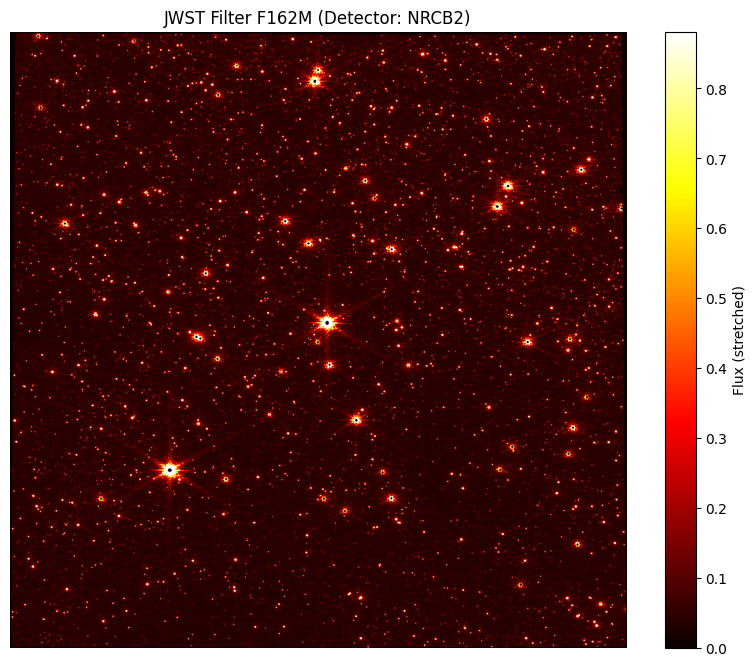

⚠️ No matching file for filter F360M with detector nrcb2
⚠️ No matching file for filter F405N with detector nrcb2
⚠️ No matching file for filter F470N with detector nrcb2


In [76]:
import os
import glob
import re
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

filters = ['F162M', 'F360M', 'F405N', 'F470N']
selected_files = {}

# 💡 SET YOUR DETECTOR HERE
detector_id = "nrcb2"  # e.g., 'nrcb1', 'nrcb3', 'nrcalong'

# Helper: regex to extract detector ID
def extract_detector(filename):
    match = re.search(r'jw\d+_\d+_\d+_(nrc[a-z0-9]+)', filename, re.IGNORECASE)
    return match.group(1).lower() if match else None

# print(f"📌 Base file for alignment: {f162m_file}")
# print(f"🔍 Using detector ID: {detector_id}")

# Step 2: Match all filters to the same detector
for filt in filters:
    search_path = os.path.join('sgrc_download', filt, '**', '*_i2d.fits')
    fits_files = glob.glob(search_path, recursive=True)

    matching_file = None
    for f in fits_files:
        if extract_detector(f) == detector_id:
            matching_file = f
            break

    if not matching_file:
        print(f"⚠️ No matching file for filter {filt} with detector {detector_id}")
        continue

    print(f"📂 Selected: {matching_file}")
    selected_files[filt] = matching_file

    # --- Load and display the FITS image ---
    with fits.open(matching_file) as hdul:
        data = hdul['SCI'].data
        image = data[0] if data.ndim == 3 else data

    image = np.nan_to_num(image)

    # Normalize and stretch
    vmin, vmax = np.percentile(image, [1, 99.5])
    image_clipped = np.clip(image, vmin, vmax)
    stretched = np.arcsinh((image_clipped - vmin) / (vmax - vmin + 1e-8))

    # Display
    plt.figure(figsize=(10, 8))
    plt.imshow(stretched, cmap='hot', origin='lower')
    plt.title(f"JWST Filter {filt.upper()} (Detector: {detector_id.upper()})")
    plt.colorbar(label='Flux (stretched)')
    plt.axis('off')
    plt.show()


In [23]:
from astropy.io import fits
from jdaviz import Imviz
from IPython.display import display
import glob
import os

# --- Locate the FITS file ---
filt = 'F115W'
search_path = os.path.join('sgrc_download', filt, '**', '*_i2d.fits')
fits_files = glob.glob(search_path, recursive=True)

if not fits_files:
    print(f"❌ No I2D FITS file found for filter {filt}")
else:
    file_path = fits_files[0]
    print(f"📂 Found: {file_path}")

    # --- Launch jdaviz Imviz viewer ---
    imviz = Imviz()
    imviz.load_data(file_path)
    display(imviz.app)



📂 Found: sgrc_download/F115W/mastDownload/JWST/jw04147012001_08101_00006_nrcb1/jw04147012001_08101_00006_nrcb1_i2d.fits


Application(config='imviz', docs_link='https://jdaviz.readthedocs.io/en/v4.2.1/imviz/index.html', events=['cal…

Support for third party widgets will remain active for the duration of the session. To disable support:

Support for third party widgets will remain active for the duration of the session. To disable support:

In [74]:
from astropy.io import fits
import os
import glob
from collections import defaultdict

base_dir = 'sgrc_download'
detector_groups = defaultdict(list)

# Look for all *_i2d.fits files in the full download directory
fits_files = glob.glob(os.path.join(base_dir, '*', '**', '*_i2d.fits'), recursive=True)

# Scan each file and group by DETECTOR keyword
for file_path in fits_files:
    try:
        with fits.open(file_path) as hdul:
            header = hdul[0].header
            detector = header.get('DETECTOR', 'UNKNOWN')
            filt = header.get('FILTER', 'UNKNOWN')

            detector_groups[detector].append({
                'file': file_path,
                'filter': filt
            })
    except Exception as e:
        print(f"⚠️ Failed to read {file_path}: {e}")

# Print the grouped files
print("\n🔍 Detectors and filters available:")
for det, files in detector_groups.items():
    print(f"\n🧪 {det} ({len(files)} files):")
    for entry in files:
        print(f"   - Filter: {entry['filter']:7s} | {os.path.basename(entry['file'])}")



🔍 Detectors and filters available:

🧪 NRCALONG (30 files):
   - Filter: F444W   | jw04147012001_04101_00002_nrcalong_i2d.fits
   - Filter: F444W   | jw04147012001_02101_00002_nrcalong_i2d.fits
   - Filter: F444W   | jw04147012001_04101_00001_nrcalong_i2d.fits
   - Filter: F444W   | jw04147012001_02101_00003_nrcalong_i2d.fits
   - Filter: F444W   | jw04147012001_02101_00006_nrcalong_i2d.fits
   - Filter: F444W   | jw04147012001_02101_00005_nrcalong_i2d.fits
   - Filter: F444W   | jw04147012001_04101_00005_nrcalong_i2d.fits
   - Filter: F444W   | jw04147012001_04101_00006_nrcalong_i2d.fits
   - Filter: F444W   | jw04147012001_04101_00003_nrcalong_i2d.fits
   - Filter: F444W   | jw04147012001_02101_00004_nrcalong_i2d.fits
   - Filter: F444W   | jw04147012001_04101_00004_nrcalong_i2d.fits
   - Filter: F444W   | jw04147012001_02101_00001_nrcalong_i2d.fits
   - Filter: F444W   | jw04147012001_04101_00002_nrcalong_i2d.fits
   - Filter: F444W   | jw04147012001_04101_00001_nrcalong_i2d.fits
  

📂 Loading F162M: ./sgrc_download/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrca3/jw04147012001_04101_00003_nrca3_i2d.fits
📂 Loading F360M: ./sgrc_download/F360M/mastDownload/JWST/jw04147-o012_t001_nircam_clear-f360m/jw04147-o012_t001_nircam_clear-f360m_i2d.fits


/usr/local/lib/python3.11/dist-packages/reproject/common.py:170: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  return reproject_func(


   🔁 Reprojected shape: (2065, 2058), min: nan, max: nan
📂 Loading F405N: ./sgrc_download/F405N/mastDownload/JWST/jw04147012001_04101_00002_nrcalong/jw04147012001_04101_00002_nrcalong_i2d.fits


/usr/local/lib/python3.11/dist-packages/reproject/common.py:170: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  return reproject_func(


   🔁 Reprojected shape: (2065, 2058), min: nan, max: nan
📂 Loading F470N: ./sgrc_download/F470N/mastDownload/JWST/jw04147012001_02101_00001_nrcblong/jw04147012001_02101_00001_nrcblong_i2d.fits


/usr/local/lib/python3.11/dist-packages/reproject/common.py:170: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  return reproject_func(


   🔁 Reprojected shape: (2065, 2058), min: nan, max: nan

✅ All filters aligned!


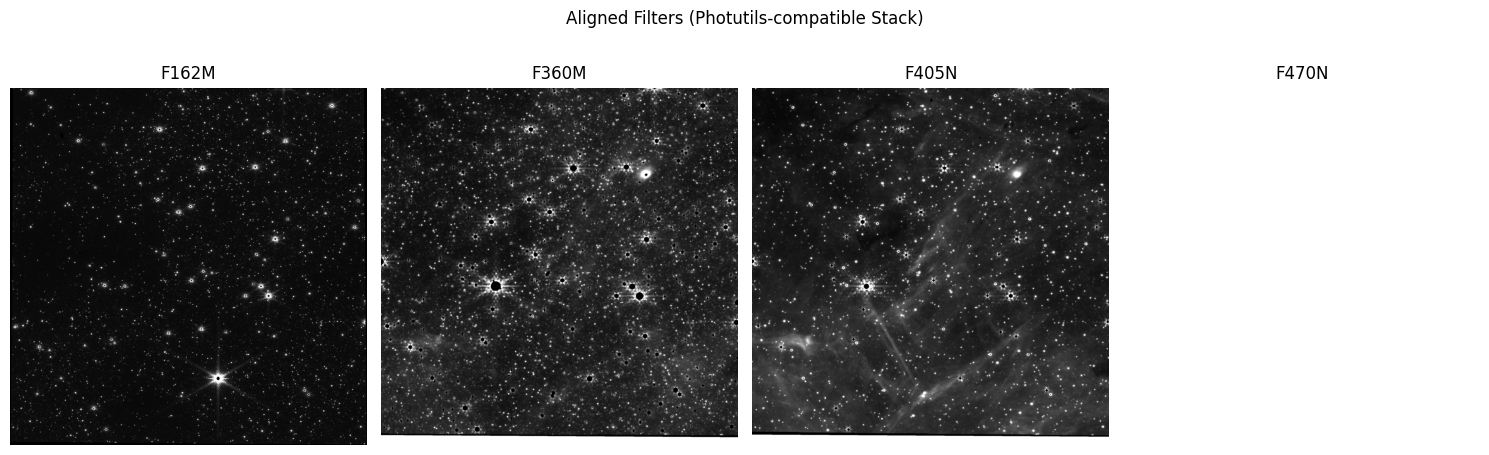

In [68]:
import os
import glob
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp, reproject_exact
import matplotlib.pyplot as plt

# --- Filters to stack ---
filters = ['F162M', 'F360M', 'F405N', 'F470N']
base_dir = './sgrc_download'
stacked_data = {}
ref_wcs = None
ref_shape = None

# --- Load and align each filter ---
for filt in filters:
    pattern = os.path.join(base_dir, filt, '**', '*_i2d.fits')
    files = glob.glob(pattern, recursive=True)
    if not files:
        print(f"❌ No file found for {filt}")
        continue

    file_path = files[0]
    print(f"📂 Loading {filt}: {file_path}")

    with fits.open(file_path) as hdul:
        data = hdul['SCI'].data
        header = hdul['SCI'].header
        wcs = WCS(header)

        if data.ndim == 3:
            data = data[0]

        # Clean and stretch
        data = np.nan_to_num(data)
        vmin, vmax = np.percentile(data, [1, 99.5])
        clipped = np.clip(data, vmin, vmax)
        norm = np.arcsinh((clipped - vmin) / (vmax - vmin + 1e-8))

        # Store reference WCS and shape
        if ref_wcs is None:
            ref_wcs = wcs
            ref_shape = norm.shape
            stacked_data[filt] = norm
        else:
            aligned, _ = reproject_exact((norm, wcs), ref_wcs, shape_out=ref_shape)
            print(f"   🔁 Reprojected shape: {aligned.shape}, min: {np.min(aligned):.3f}, max: {np.max(aligned):.3f}")
            stacked_data[filt] = aligned

print("\n✅ All filters aligned!")

# --- Optional: show comparison ---
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i, filt in enumerate(filters):
    if filt in stacked_data:
        axs[i].imshow(stacked_data[filt], origin='lower', cmap='gray')
        axs[i].set_title(filt)
        axs[i].axis('off')
plt.suptitle("Aligned Filters (Photutils-compatible Stack)")
plt.tight_layout()
plt.show()


Max values:
  🔵 F162M (B): 0.8814
  🟢 F360M (O): nan
  🔴 F405N:     nan
  🔴 F470N:     nan
F360M: NaNs = 105125/4249770 (2.47%)
F405N: NaNs = 111112/4249770 (2.61%)
F470N: NaNs = 4249770/4249770 (100.00%)
F162M: NaNs = 0/4249770 (0.00%)


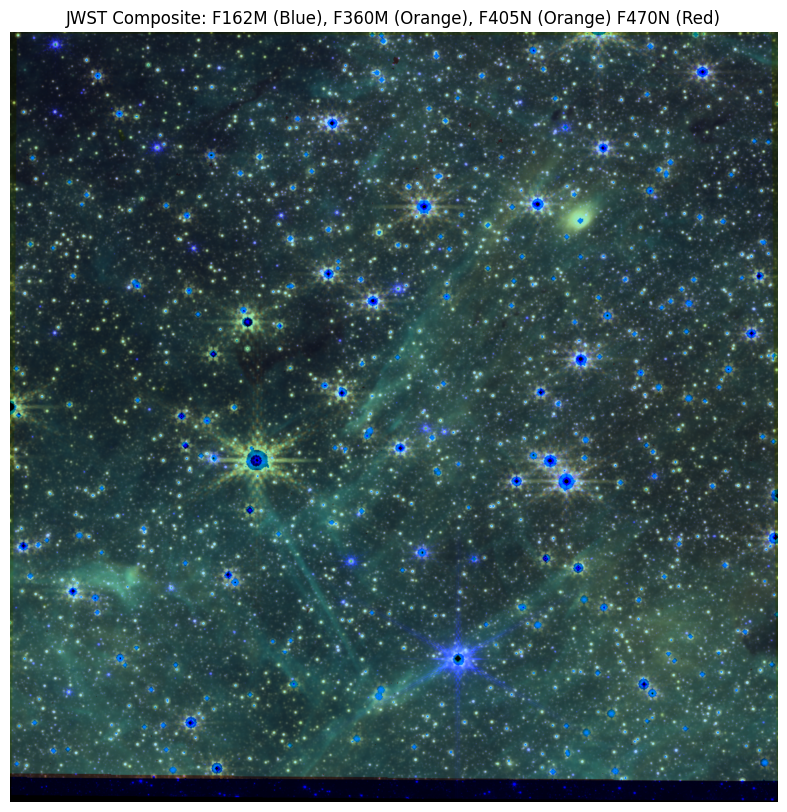

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# --- Confirm required filters are available ---
required_filters = ['F162M', 'F360M', 'F405N', 'F470N']
for f in required_filters:
    if f not in stacked_data:
        raise ValueError(f"❌ Missing filter in stacked_data: {f}")

# --- Normalize individual channels ---
B = stacked_data['F162M']
O = stacked_data['F360M']
C = stacked_data['F405N']
R = stacked_data['F470N']

print(f"Max values:")
print(f"  🔵 F162M (B): {np.max(B):.4f}")
print(f"  🟢 F360M (O): {np.max(O):.4f}")
print(f"  🔴 F405N:     {np.max(C):.4f}")
print(f"  🔴 F470N:     {np.max(R):.4f}")

def check_stats(data, name):
    total = data.size
    nan_count = np.isnan(data).sum()
    print(f"{name}: NaNs = {nan_count}/{total} ({nan_count/total:.2%})")

for filt in ['F360M', 'F405N', 'F470N', 'F162M']:
    check_stats(stacked_data[filt], filt)

def norm_band(data, stretch=True, scale=5.0):
    data = np.nan_to_num(data)
    data = data / (np.max(data) + 1e-8)
    return np.arcsinh(data * scale) / np.arcsinh(scale) if stretch else data
# Get stretched & normalized channels
F162M = norm_band(stacked_data["F162M"])  # Blue
F405N = norm_band(stacked_data["F405N"])  # Cyan = G + B
F360M = norm_band(stacked_data["F360M"])  # Orange = R + G
F470N = norm_band(stacked_data["F470N"])  # Red

# Create RGB from hue mapping
rgb = np.zeros((*F162M.shape, 3))

# Blue: F162M
rgb[..., 2] += F162M

# Cyan: F405N = B + G
rgb[..., 2] += 0.5 * F405N
rgb[..., 1] += 0.5 * F405N

# Orange: F360M = R + G
rgb[..., 0] += 0.6 * F360M
rgb[..., 1] += 0.4 * F360M

# Red: F470N
rgb[..., 0] += F470N

# Normalize & clip
rgb = np.clip(rgb, 0, 1)

# --- Display the RGB composite ---
plt.figure(figsize=(10, 10))
plt.imshow(rgb, origin='lower')
plt.axis('off')
plt.title("JWST Composite: F162M (Blue), F360M (Orange), F405N (Orange) F470N (Red)")
plt.show()


📂 Using file: sgrc_download/F115W/mastDownload/JWST/jw04147012001_08101_00006_nrcb1/jw04147012001_08101_00006_nrcb1_i2d.fits


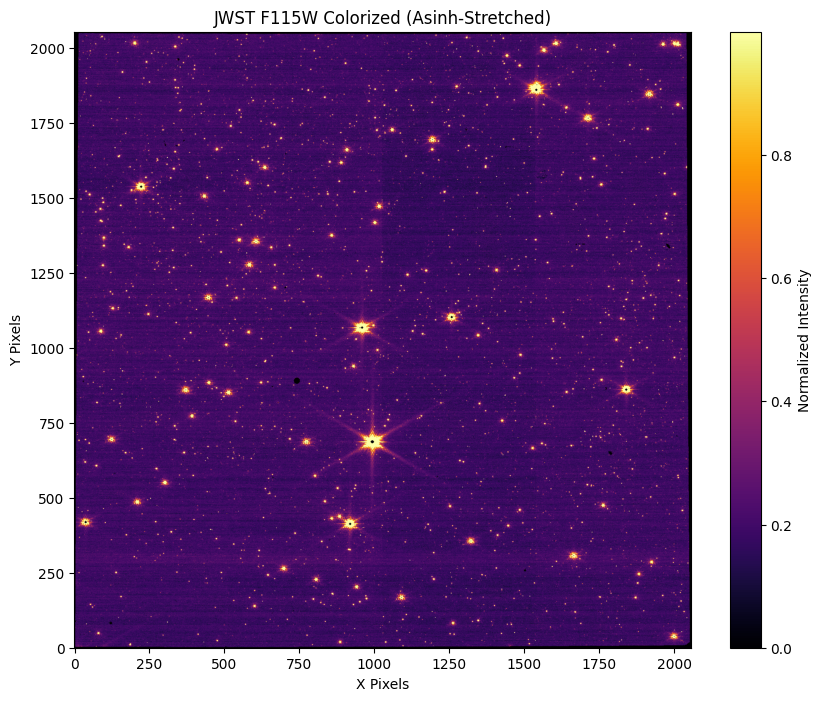

In [37]:
import os
import glob
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# --- Locate the F115W FITS file ---
pattern = os.path.join("sgrc_download", "F115W", "**", "*_i2d.fits")
files = glob.glob(pattern, recursive=True)

if not files:
    print("❌ No F115W I2D FITS file found.")
else:
    fits_file = files[0]
    print(f"📂 Using file: {fits_file}")

    # --- Load the FITS data ---
    with fits.open(fits_file) as hdul:
        data = hdul['SCI'].data
        if data.ndim == 3:
            data = data[0]  # use first integration

    # --- Clean the data ---
    data = np.nan_to_num(data)

    # --- Normalize using percentiles ---
    vmin, vmax = np.percentile(data, [1, 99.5])
    clipped = np.clip(data, vmin, vmax)

    # --- Apply stretch (asinh gives good balance) ---
    stretched = np.arcsinh((clipped - vmin) / (vmax - vmin + 1e-8))
    norm = stretched / (np.max(stretched) + 1e-8)

    # --- Map grayscale to pseudo-color (cmap) ---
    plt.figure(figsize=(10, 8))
    plt.imshow(norm, cmap='inferno', origin='lower')  # Try 'inferno', 'viridis', 'cividis' too!
    plt.title("JWST F115W Colorized (Asinh-Stretched)")
    plt.colorbar(label="Normalized Intensity")
    plt.xlabel("X Pixels")
    plt.ylabel("Y Pixels")
    plt.show()
